<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº6
#### Joaquin Gomez Lucero y Milena Waichman Scigliano


# Introduccion

En este trabajo se analiza e implementa la red bicuadrática, un tipo de filtro cuya función de transferencia puede representarse mediante polos y ceros cuadráticos. Este tipo de redes permite sintetizar filtros de segundo orden con diferentes características de frecuencia, como paso banda, rechazo de banda o paso bajo, dependiendo de la ubicación de sus polos y ceros.

El objetivo del informe es determinar los parámetros de diseño de tres funciones de transferencia específicas, calcular los valores de los componentes del circuito (resistencias, capacitores e inductores) y verificar la relación entre la frecuencia natural 
$\omega_0$ y el factor de calidad $Q$ en cada caso. La implementación se realiza asumiendo 
$C=L=1$ para simplificar los cálculos y mostrar claramente cómo se obtiene la resistencia correspondiente a cada filtro.

Este análisis permite comprender la relación directa entre las características matemáticas de la función de transferencia y su implementación física, proporcionando una guía práctica para el diseño de filtros bicuadráticos en aplicaciones electrónicas.

## 1. Cálculo de la función de transferencia 

### Cálculo de $Z_1$

La primera sección está formada por los elementos \(C a\), \(L/b\) y \(R/d\) conectados en paralelo:

$$
\frac{1}{Z_1} = s C a + \frac{b}{s L} + \frac{d}{R}
$$

Llevando a un denominador común \(sL\):

$$
\frac{1}{Z_1} = \frac{s^2 C a L + b}{sL} + \frac{d}{R}
$$

$$
\frac{1}{Z_1} = \frac{s^2 C a L + b + \frac{d\,sL}{R}}{sL}
$$

Invirtiendo la expresión:

$$
Z_1 = \frac{s R L}{s^2 R L C a + s L d + R b}
$$

Definimos:

$$
D_1(s) = s^2 R L C a + s L d + R b
$$



### Cálculo de $Z_2$

La segunda sección está formada por los elementos \(R/(1-d)\), \(L/(1-b)\) y \(C(1-a)\), también en paralelo:

$$
\frac{1}{Z_2} = \frac{1-d}{R} + \frac{1-b}{sL} + s C (1-a)
$$

Llevando a un denominador común \(R s L\):

$$
\frac{1}{Z_2} = \frac{(1-d)sL + (1-b)R + s^2 R L C (1-a)}{R s L}
$$

Invirtiendo la expresión obtenemos:

$$
Z_2 = \frac{s R L}{s^2 R L C (1-a) + s L (1-d) + R (1-b)}
$$

Definimos:

$$
D_2(s) = s^2 R L C (1-a) + s L (1-d) + R (1-b)
$$



### Cálculo de la impedancia equivalente

Como $Z_1$ y $Z_2$ están en serie:

$$
Z_{eq} = Z_1 + Z_2 = \frac{sRL}{D_1(s)} + \frac{sRL}{D_2(s)} = \frac{sRL \big(D_2(s) + D_1(s)\big)}{D_1(s)\,D_2(s)}
$$



### Relación de tensiones $V_2/V_1$

Aplicando el divisor de tensión:

$$
\frac{V_2}{V_1} = \frac{Z_2}{Z_1 + Z_2}
= \frac{\frac{sRL}{D_2(s)}}{\frac{sRL}{D_2(s)} + \frac{sRL}{D_1(s)}}
= \frac{1/D_2(s)}{1/D_2(s) + 1/D_1(s)}
= \frac{D_1(s)}{D_2(s) + D_1(s)}
$$

Sustituyendo \(D_1(s)\) y \(D_2(s)\):

$$
D_2(s) + D_1(s) = s^2 R L C (1-a + a) + s L (1-d + d) + R (1-b + b)
= s^2 R L C + s L + R
$$

Por lo tanto, la función de transferencia resulta:

$$
\frac{V_2(s)}{V_1(s)} =
\frac{s^2 R L C a + s L d + R b}{s^2 R L C + s L + R}
$$

---

### Forma normalizada

Dividiendo numerador y denominador por $RLC$:

$$
T(s) = \frac{a s^2 + s \frac{d}{RC} + \frac{b}{LC}}
             {s^2 + s \frac{1}{RC} + \frac{1}{LC}}
$$


# 2) Parametrización bicuadrática (SOS) y determinación de parámetros

Partimos de la forma estándar bicuadrática:

$$
T(s)=k\cdot\frac{s^2 + s\dfrac{\omega_{0Z}}{Q_Z} + \omega_{0Z}^2}{s^2 + s\dfrac{\omega_{0P}}{Q_P} + \omega_{0P}^2}.
$$

Comparando con la expresión ya obtenida

$$
T(s)=a\frac{s^2 + s \dfrac{d}{aRC} + \dfrac{b}{aLC}}
             {s^2 + s \dfrac{1}{RC} + \dfrac{1}{LC}},
$$

igualamos coeficientes numerador/denominador:

- **Ganancia (k):**

  Se obtiene
  $$k=a$$

- **Polos (denominador):**

  Despejamos $\omega_{0P}$ y $Q_P$

  $${\frac{\omega_{0P}}{Q_P}=\frac{1}{RC},}
  \qquad
  {\omega_{0P}^2=\frac{1}{LC}\;\Rightarrow\;\omega_{0P}=\frac{1}{\sqrt{LC}}.}
  $$
  Finalmente,
  $$
  {Q_P=\frac{\omega_{0P}}{(1/RC)}=\frac{1/\sqrt{LC}}{1/RC}=R\sqrt{\frac{C}{L}}.}
  $$

- **Ceros (numerador):**

  Despejamos $\omega_{0Z}$ y $Q_Z$
  
  $${\frac{\omega_{0Z}}{Q_Z}=\frac{d}{aRC},}
  \qquad
  {\omega_{0Z}^2=\frac{b}{aLC}\;\Rightarrow\;\omega_{0Z}=\sqrt{\frac{b}{aLC}}.}
  $$
  Y por tanto
  $$
  {Q_Z=\frac{\omega_{0Z}}{d/(aRC)}
  =\frac{aRC}{d}\,\omega_{0Z}
  =\frac{aRC}{d}\sqrt{\frac{b}{aLC}}
  =\frac{R}{d}\sqrt{\frac{a b C}{L}}\,.}
  $$

---

A modo de resumen los valores de los parametros son:

$$k=a$$

$${\,\omega_{0P}=\dfrac{1}{\sqrt{LC}},\qquad Q_P=R\sqrt{\dfrac{C}{L}},\qquad \dfrac{\omega_{0P}}{Q_P}=\dfrac{1}{RC}\,}$$

$${\,\omega_{0Z}=\sqrt{\dfrac{b}{aLC}},\qquad
Q_Z=\dfrac{R}{d}\sqrt{\dfrac{a b C}{L}},\qquad
\dfrac{\omega_{0Z}}{Q_Z}=\dfrac{d}{aRC}\,}$$


# 3) Implementación de la red bicuadratica
 En este ejercicio se implementan tres filtros bicuadráticos distintos a partir de sus funciones de transferencia. El objetivo es determinar los parámetros característicos de cada filtro, frecuencias naturales ($\omega_0$) y factores de calidad ($Q$) y luego calcular los valores de los componentes del circuito (resistencias, capacitores e inductores) necesarios para su implementación física.

Se asume $C=L=1$ para simplificar los cálculos y poder expresar las resistencias directamente en función de $\omega_0$ y $Q$, usando la relación estándar $\frac{\omega_0}{Q}=\frac{1}{RC}$. Este enfoque permite conectar de manera directa la forma matemática de la función de transferencia con el diseño físico del circuito, facilitando la síntesis de filtros de segundo orden con las características deseadas.

### 3.1 

Consideramos la función de transferencia:

$$
T_1(s) = \frac{s^2 + 9}{s^2 + s\sqrt{2} + 1}
$$

Comparando con la forma estándar de un bicuadrático obtenemos:

$$
\omega_{0Z}^2 = 9, \quad
\omega_{0P}^2 = 1, \quad
Q_P = \frac{1}{\sqrt{2}}
$$

Para la implementación de la red bicuadrática con $C = L = 1$, los parámetros del circuito son:

$$
a = 1, \quad
b = 1, \quad
d = 9
$$

La resistencia del polo se calcula usando:

$$
\frac{\omega_{0P}}{Q_P} = \frac{1}{R C} \quad \Rightarrow \quad
R = \frac{1}{C} \frac{Q_P}{\omega_{0P}} = \frac{1}{\sqrt{2}}
$$



### 3.2 

Consideramos la función de transferencia:

$$
T_2(s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \frac{1}{5} + 1}
$$

Comparando con la forma estándar de un bicuadrático obtenemos:

$$
\omega_{0Z} = \frac{1}{3}, \quad
\omega_{0P} = 1, \quad
Q_P = 5
$$

Para la implementación de la red bicuadrática con $C = L = 1$, los parámetros del circuito son:

$$
a = 1, \quad
b = \frac{1}{9}, \quad
d = 0
$$

La resistencia del polo se calcula usando:

$$
\frac{\omega_{0P}}{Q_P} = \frac{1}{R C} \quad \Rightarrow \quad
R = \frac{Q_P}{\omega_{0P}} = 5
$$


### 3.3 

Consideramos la función de transferencia:

$$
T_3(s) = \frac{s^2 + s \frac{1}{5} + 1}{s^2 + s \sqrt{2} + 1}
$$

Comparando con la forma estándar de un bicuadrático obtenemos:

$$
\omega_{0Z} = 1, \quad
Q_Z = 5, \quad
\omega_{0P} = 1, \quad
Q_P = \frac{1}{\sqrt{2}}
$$

Para la implementación de la red bicuadrática con $C = L = 1$, los parámetros del circuito son:

$$
a = 1, \quad
b = 1, \quad
d = \frac{1}{5}
$$

La resistencia del polo se calcula usando:

$$
\frac{\omega_{0P}}{Q_P} = \frac{1}{R C} \quad \Rightarrow \quad
R = \frac{Q_P}{\omega_{0P}} = \frac{1}{\sqrt{2}}
$$


# 4 y 5) Diagramas de polos y ceros, respuesta de módulo y fase

Para comprender el comportamiento de un filtro bicuadrático, es fundamental analizar sus características tanto en el plano de polos y ceros como en el dominio de la frecuencia.

El diagrama de polos y ceros permite visualizar la ubicación de los polos y ceros en el plano complejo, lo que proporciona información directa sobre la estabilidad del sistema y la selectividad del filtro: los polos cercanos al eje imaginario indican picos resonantes, mientras que los ceros determinan las frecuencias donde la respuesta es nula.

La respuesta en magnitud muestra cómo el filtro atenúa o amplifica señales según la frecuencia. Es útil para identificar la banda de paso, la banda de rechazo y la ganancia máxima del filtro.

La respuesta en fase indica el desplazamiento de fase introducido por el filtro a cada frecuencia. A partir de ella se puede calcular el retardo de grupo, que es crucial para señales donde la preservación de la forma de onda es importante.

En conjunto, estos gráficos permiten relacionar las propiedades matemáticas de la función de transferencia con el comportamiento dinámico del filtro, proporcionando una visión completa de su rendimiento en frecuencia.

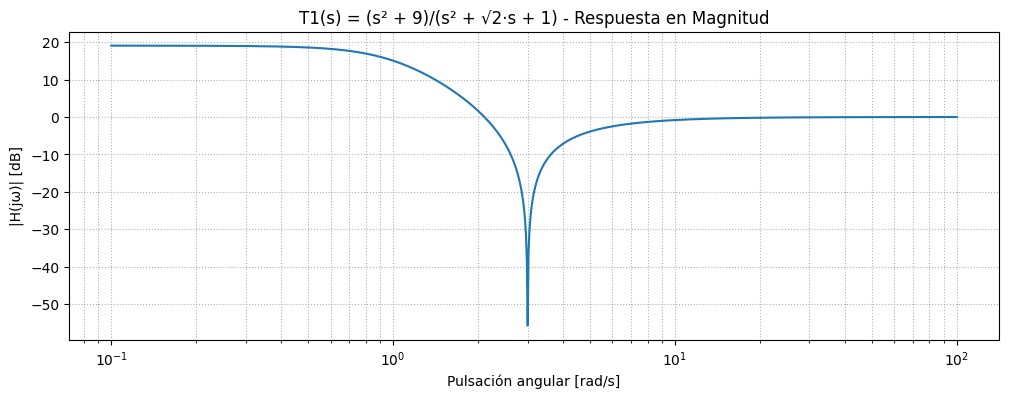

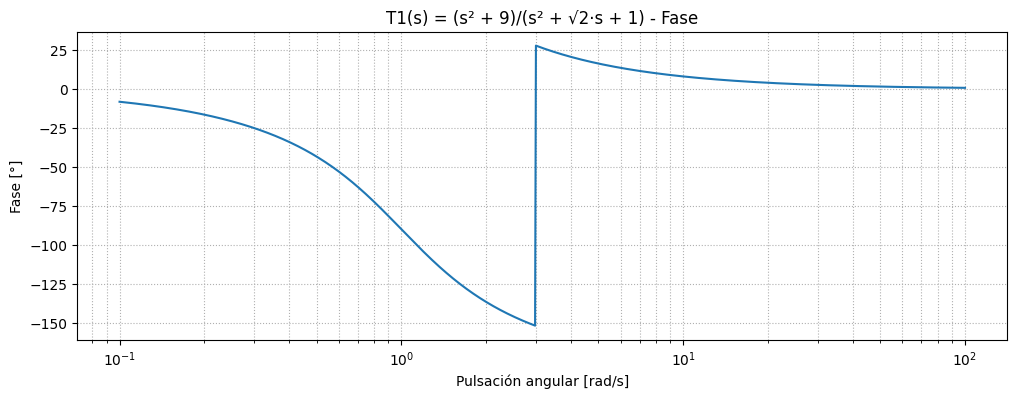

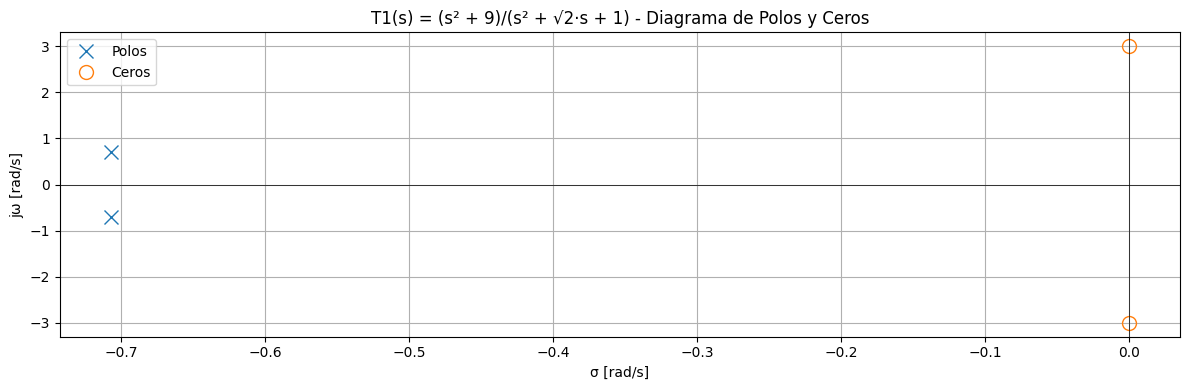

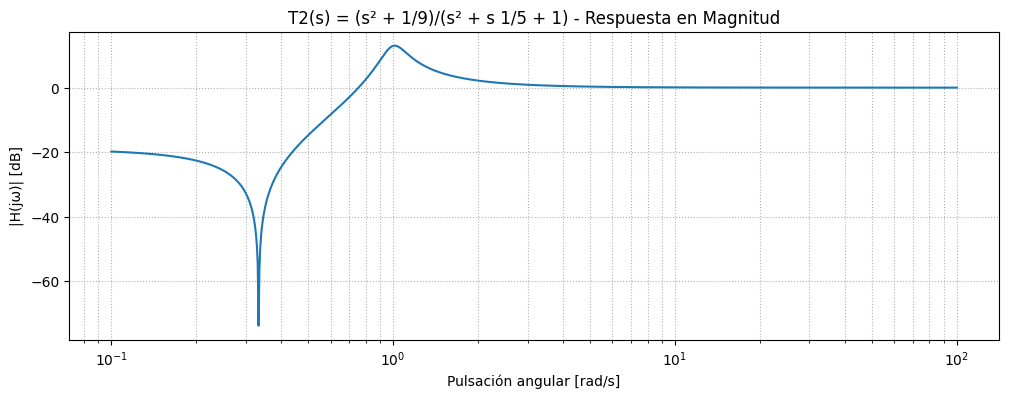

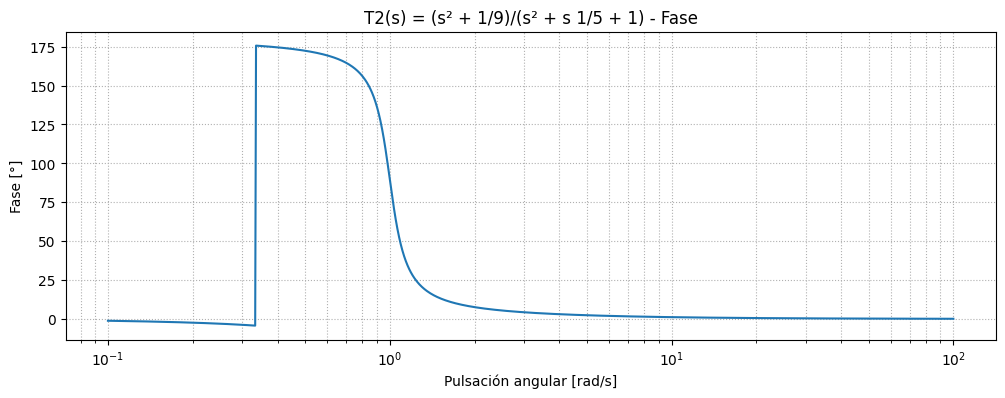

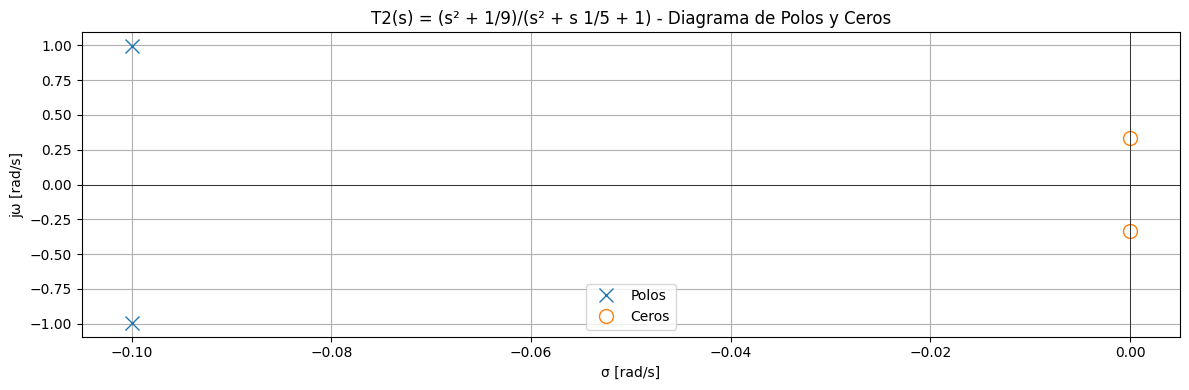

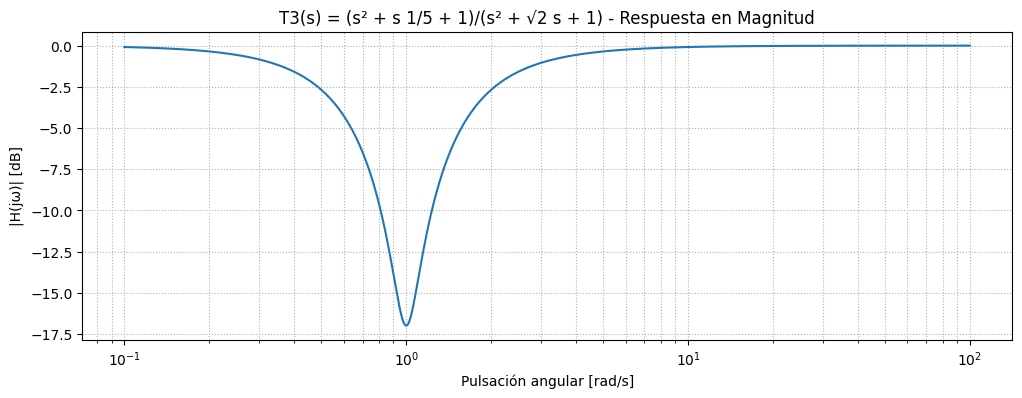

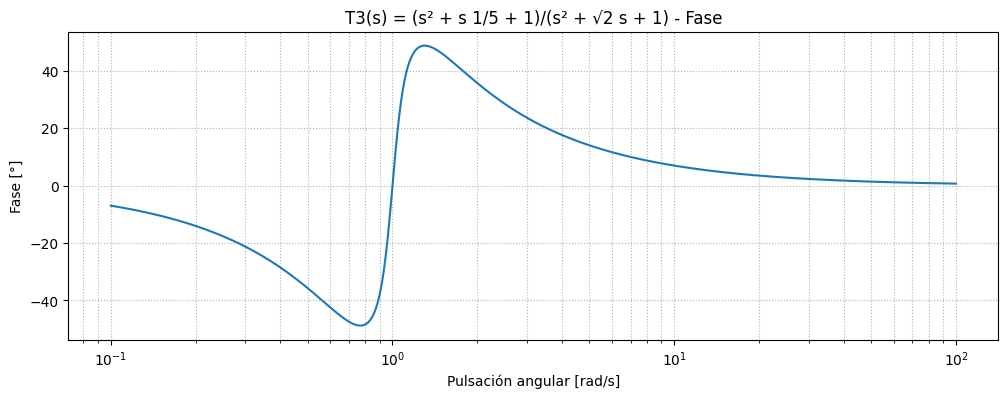

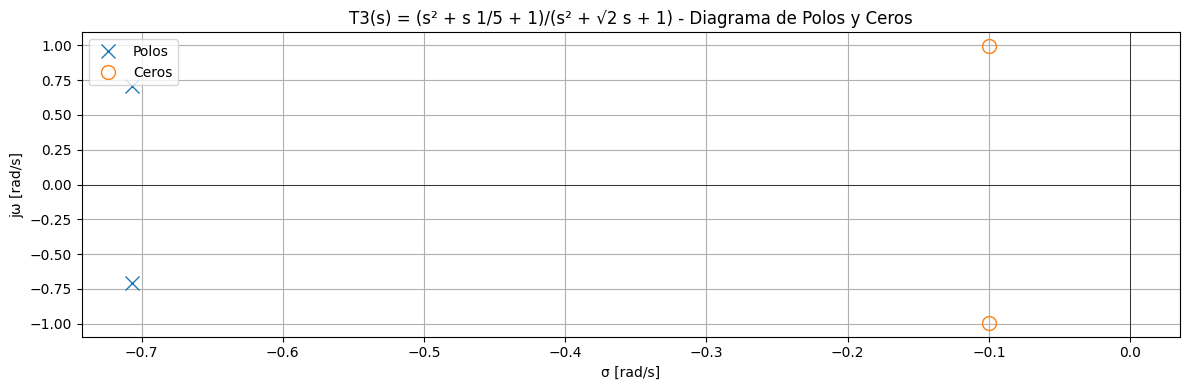

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

filtros = {
    "T1(s) = (s² + 9)/(s² + √2·s + 1)": ([1, 0, 9], [1, np.sqrt(2), 1]),
    "T2(s) = (s² + 1/9)/(s² + s 1/5 + 1)": ([1, 0, 1/9], [1, 1/5, 1]),
    "T3(s) = (s² + s 1/5 + 1)/(s² + √2 s + 1)": ([1, 1/5, 1], [1, np.sqrt(2), 1])
}

# Gráficos para cada función transferencia 

for f_nombre, (b, a) in filtros.items():
    
    # --- Respuesta en frecuencia ---
    w, h = signal.freqs(b=b, a=a, worN=np.logspace(-1, 2, 1000))
    fase = np.unwrap(np.angle(h))
    gd = -np.diff(fase) / np.diff(w)
    
    # --- Polos y ceros ---
    z, p, k = signal.tf2zpk(b, a)
    
    # --- Gráficas ---
    
    # Magnitud
    plt.figure(figsize=(12, 4))
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title(f'{f_nombre} - Respuesta en Magnitud')
    plt.xlabel('Pulsación angular [rad/s]')
    plt.ylabel('|H(jω)| [dB]')
    plt.grid(True, which='both', ls=':')
    
    # Fase
    plt.figure(figsize=(12, 4))
    plt.semilogx(w, np.degrees(fase))
    plt.title(f'{f_nombre} - Fase')
    plt.xlabel('Pulsación angular [rad/s]')
    plt.ylabel('Fase [°]')
    plt.grid(True, which='both', ls=':')

    # Diagrama de polos y ceros
    plt.figure(figsize=(12, 4))
    plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label='Polos')
    if len(z) > 0:
        plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label='Ceros')
    plt.axhline(0, color='k', lw=0.5)
    plt.axvline(0, color='k', lw=0.5)
    plt.title(f'{f_nombre} - Diagrama de Polos y Ceros')
    plt.xlabel('σ [rad/s]')
    plt.ylabel('jω [rad/s]')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# Análisis comparativo de las funciones:

## **T₁(s)** → Filtro *Rechaza–banda(Notch)*
  Atenúa una banda muy estrecha alrededor de ω ≈ 3 rad/s.


### Polos y ceros
- Polos: $s=-\dfrac{\sqrt{2}}{2}\pm j\,\dfrac{\sqrt{2}}{2}$  
  $\Rightarrow \omega_p=1,\ \dfrac{\omega_p}{Q}= \sqrt{2} \Rightarrow Q=\dfrac{1}{\sqrt{2}}\approx0.707$
- Ceros: $s=\pm j\,3 \Rightarrow \omega_z=3$

### Magnitud
$|H(0)|=9\ (\approx+19.1\,\text{dB}), \quad |H(j\omega\to\infty)|=1\ (0\,\text{dB})$

Presenta una banda de rechazo en $\omega\approx3\,\text{rad/s}$ .  
Deja pasar bajas frecuencias (ganancia alta) y altas (0 dB).

### Fase
Cambia bruscamente alrededor del notch (por los ceros en el eje $j\omega$).  
Tiende a $0^\circ$ en altas frecuencias.



## **T₂(s)** → Filtro *Pasa–banda*  
  Tiene un pico de resonancia pronunciado en ω ≈ 1 rad/s (Q alto).


### Polos y ceros
- Polos: raíces de $s^2+\tfrac{1}{5}s+1=0$  
  $\Rightarrow \omega_p=1,\ \dfrac{\omega_p}{Q}= \tfrac{1}{5}\Rightarrow Q=5$ (alto)
- Ceros: $s=\pm j\,\tfrac{1}{3}\Rightarrow \omega_z=\tfrac{1}{3}$

### Magnitud
$|H(0)|=\tfrac{1}{9}\ (\approx -19.1\,\text{dB}),\quad |H(j\omega\to\infty)|=1\ (0\,\text{dB})$

Muestra atenuación fuerte en baja frecuencia (por los ceros en $\omega_z=0.33$)  
y un pico de resonancia cerca de $\omega\approx1\,\text{rad/s}$ debido al **$Q$ alto**.  
En altas frecuencias, la respuesta vuelve a 0 dB.

### Fase
Varía rápidamente alrededor de $\omega\approx1$, donde se produce la resonancia.  
El ángulo pasa de 0° a alrededor de −180°.



## **T₃(s)** → Filtro *Rechaza–banda*  
  Presenta una atenuación moderada en ω ≈ 1 rad/s, con transición de fase más suave.

### Polos y ceros
- Polos: $s=-\dfrac{\sqrt{2}}{2}\pm j\,\dfrac{\sqrt{2}}{2}$  
  $\Rightarrow \omega_p=1,\ Q=1/\sqrt{2}\approx0.707$
- Ceros: raíces de $s^2+\tfrac{1}{5}s+1$  
  $\Rightarrow \omega_z=1,\ \dfrac{\omega_z}{Q_z}=\tfrac{1}{5}\Rightarrow Q_z=5$

### Magnitud
$|H(0)|=1,\quad |H(j\omega\to\infty)|=1$

Presenta un rechazo de banda suave alrededor de $\omega\approx1\,\text{rad/s}$  
(efecto de cancelación parcial entre polos y ceros cercanos).  
La atenuación máxima es moderada (≈ −17 dB).

### Fase
Transición suave en la zona del rechazo, con leve sobrepaso positivo.  
Tiende a $0^\circ$ en altas frecuencias.



# Conclusion

En este trabajo se analizaron e implementaron tres redes bicuadráticas de segundo orden, representadas por las funciones de transferencia T1, T2 y T3, a partir de sus polos y ceros. El estudio combinó el análisis teórico de la función de transferencia, el cálculo de la respuesta asintótica mediante límites y la simulación en Python de magnitudes, fases y diagramas de polos y ceros.

Se identificaron distintos tipos de filtros en las tres redes analizadas. Cada filtro se pudo identificar mediante, la respuesta en magnitud, fase y el diagrama de polos y ceros. 

En todos los casos, el análisis mostró claramente cómo la ubicación de polos y ceros determina la magnitud, la fase y la respuesta asintótica, proporcionando una comprensión integral del comportamiento de los filtros bicuadráticos.


## Autoevaluacion

*Indicar una opción (marcada con negrita):*

1. Resolví la tarea con seguridad
**2. Resolví la tarea, pero tengo dudas**
3. Resolví la tarea,pero no entendí bien
4. No pude resolverla y no entendí


Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea aprendimos a calcular una funcion de transferencia usando divisor de tension a partir de un circuito electrico, luego a analizar los parametros que componen este sistema usando distintas funciones de tranferencia y finalmente graficar magnitud, fase y diagrama de polos y ceros.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Quedo claro como resolver una funcion de transferencia y como graficar los distintos puntos a analizar, nos quedaron dudas sobre como hacer el bonus, ya que los valores que obtuvimos resultaban en elementos con valores extraños que no supinos interpretar, por eso decidimos no ponerlo en el informe.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones